In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar datos (ajustar ruta)
df = pd.read_csv("./datos_territorio/datos_vivienda.csv", decimal=".")

In [3]:
# Identificar datos originales (no faltantes) antes de imputar
mask_original = df["Huella Urbana"].notna()  # Máscara de datos originales
# Convertir "Huella Urbana" a numérico (por si hay errores)
df["Huella Urbana"] = pd.to_numeric(df["Huella Urbana"], errors="coerce")

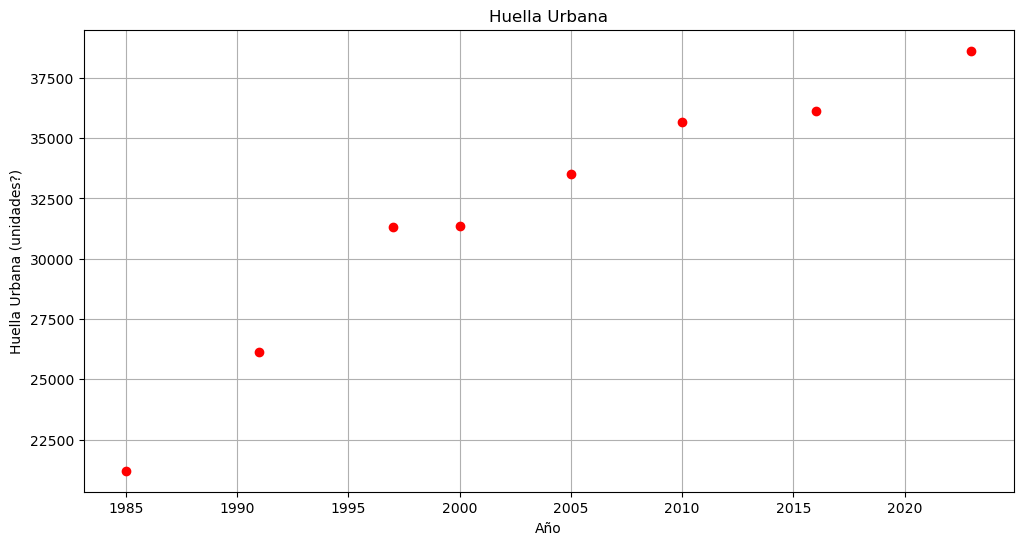

In [4]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df["año"], df["Huella Urbana"], marker="o", linestyle="--", color="red")
plt.title("Huella Urbana")
plt.xlabel("Año")
plt.ylabel("Huella Urbana (unidades?)")
plt.grid(True)
plt.show()

In [5]:
# Paso 1: Interpolación lineal entre años con datos
# df["Huella Urbana"] = df["Huella Urbana"].interpolate(method="linear")
df["Huella Urbana"] = df["Huella Urbana"].interpolate(method="spline", order=3)

In [6]:
df

,año,población,Huella Urbana,Área protegida,Area disponible,Viviendas (ocupadas),Viviendas (total)
0,1980,3753117,NaN,NaN,NaN,749933.0,778545.0
1,1981,3876219,NaN,NaN,NaN,773682.0,803200.0
2,1982,4000258,NaN,NaN,NaN,798184.0,828637.0
3,1983,4125066,NaN,NaN,NaN,823461.0,854878.0
4,1984,4250881,NaN,NaN,NaN,849539.0,881951.0
5,1985,4376707,21210.000000,414.72,142390.0,876443.0,909881.0
6,1986,4503632,21498.556590,NaN,NaN,904198.0,938696.0
7,1987,4629733,22073.117651,NaN,NaN,932833.0,968423.0
8,1988,4755662,22878.098690,NaN,NaN,962374.0,999091.0
9,1989,4882163,23857.987317,NaN,NaN,992851.0,1030731.0


In [7]:
# Paso 2: Extrapolación hacia atrás (para años < 1985)
# Ajustar una regresión lineal a los primeros datos conocidos (1985-1991)
mask_huella = df["Huella Urbana"].notna()
model_huella = np.polyfit(
    df.loc[mask_huella, "año"][:7],  # Usar solo 1985 y 1991 para la tendencia inicial
    df.loc[mask_huella, "Huella Urbana"][:7],
    deg=1
)

In [8]:
# Predecir valores para años anteriores a 1985
mask_pre_1985 = df["año"] < 1985
df.loc[mask_pre_1985, "Huella Urbana"] = np.polyval(
    model_huella,
    df.loc[mask_pre_1985, "año"]
)


In [9]:
# Asegurar que no haya valores negativos
df["Huella Urbana"] = df["Huella Urbana"].clip(lower=0)

In [10]:
# Paso 3: Redondear a 2 decimales
df["Huella Urbana"] = df["Huella Urbana"].round(2)

In [11]:
df.head(10)

,año,población,Huella Urbana,Área protegida,Area disponible,Viviendas (ocupadas),Viviendas (total)
0,1980,3753117,16532.92,NaN,NaN,749933.0,778545.0
1,1981,3876219,17369.79,NaN,NaN,773682.0,803200.0
2,1982,4000258,18206.65,NaN,NaN,798184.0,828637.0
3,1983,4125066,19043.52,NaN,NaN,823461.0,854878.0
4,1984,4250881,19880.39,NaN,NaN,849539.0,881951.0
5,1985,4376707,21210.00,414.72,142390.0,876443.0,909881.0
6,1986,4503632,21498.56,NaN,NaN,904198.0,938696.0
7,1987,4629733,22073.12,NaN,NaN,932833.0,968423.0
8,1988,4755662,22878.10,NaN,NaN,962374.0,999091.0
9,1989,4882163,23857.99,NaN,NaN,992851.0,1030731.0


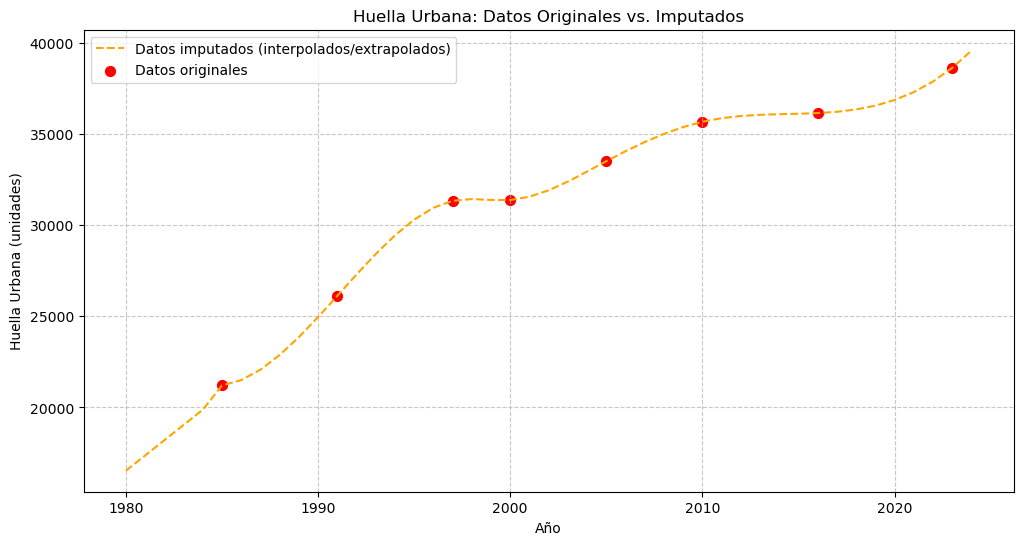

In [12]:
plt.figure(figsize=(12, 6))
# Graficar datos imputados (línea continua)
plt.plot(
    df["año"], 
    df["Huella Urbana"], 
    color="orange", 
    linestyle="--", 
    label="Datos imputados (interpolados/extrapolados)"
)

# Graficar datos originales (puntos en rojo)
plt.scatter(
    df.loc[mask_original, "año"], 
    df.loc[mask_original, "Huella Urbana"], 
    color="red", 
    marker="o", 
    s=50, 
    label="Datos originales"
)

# Personalizar
plt.title("Huella Urbana: Datos Originales vs. Imputados")
plt.xlabel("Año")
plt.ylabel("Huella Urbana (unidades)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(loc="upper left")

# Mostrar
plt.show()

In [13]:
df.to_csv("./datos_territorio/datos_huella.csv", index=False, encoding="utf-8-sig")